<a href="https://colab.research.google.com/github/techakilan/python-datascience-training/blob/master/PythonBasicDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np

### CSV from Google drive

##### Mount from google drive

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##### Import csv file from google drive and create dataframe

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/colabs_data/titanic/train.csv')
train_df

In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/colabs_data/titanic/test.csv')
test_df

##### head()

In [ ]:
train_df.head()

In [ ]:
train_df.head(10)

##### tail()

In [ ]:
train_df.tail()

In [ ]:
train_df.tail(10)

##### shape()

In [ ]:
train_df.shape

(891, 12)

In [ ]:
test_df.shape

(418, 11)

##### Get info() of the Dataframe

In [ ]:
train_df.info()

In [ ]:
train_df.describe()

38% of the passengers survived

#### Missing data

In [ ]:
# missing values as absolute number

train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# missing values as percentages

missingvals = train_df.isnull().sum()/len(train_df)
missingvals.sort_values(ascending=False)

Cabin          0.771044
Age            0.198653
Embarked       0.002245
Fare           0.000000
Ticket         0.000000
Parch          0.000000
SibSp          0.000000
Sex            0.000000
Name           0.000000
Pclass         0.000000
Survived       0.000000
PassengerId    0.000000
dtype: float64

In [10]:
train_df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

##### Age

In [22]:
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].dropna().median())

In [9]:
# check number of missing values
train_df['Age'].isna().sum()

0

##### Embarked

In [19]:
train_df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [20]:
train_df["Embarked"] = train_df["Embarked"].fillna('S')

##### Cabin

In [24]:
train_df['Cabin'] = train_df['Cabin'].fillna("U0")

In [ ]:
train_df['Cabin']

In [ ]:
missingvals = train_df.isnull().sum()/len(train_df)
missingvals.sort_values(ascending=False)

#### Data exploration

In [27]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

###### Seperate features into numerical and categorical

In [29]:
train_df_num = train_df[['Age','SibSp','Parch','Fare']]
train_df_cat = train_df[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

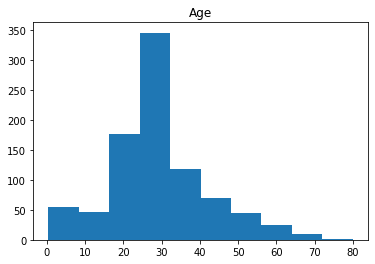

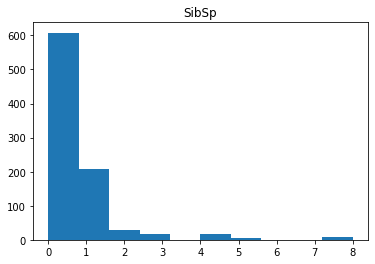

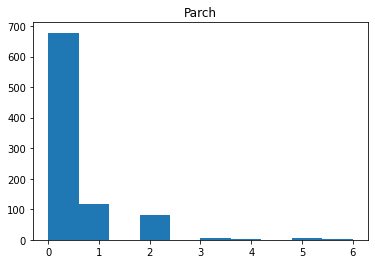

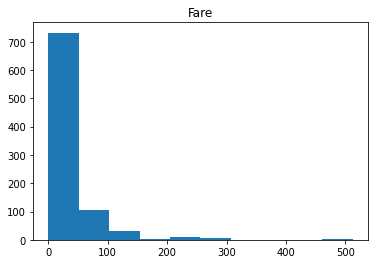

In [36]:
for i in train_df_num.columns:
    plt.hist(train_df_num[i])
    plt.title(i)
    plt.show()

Age is close to normal. Others are scattered.

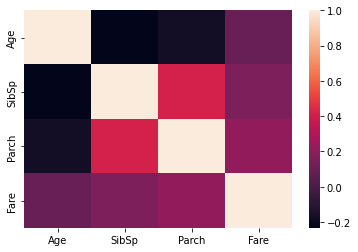

In [31]:
sns.heatmap(train_df_num.corr())

The only significant correlation is between SibSp and Parch

In [32]:
pd.pivot_table(train_df, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.028233,22.117887,0.329690,0.553734
1,28.291433,48.395408,0.464912,0.473684


##### Survived

In [ ]:
sns.heatmap(train_df.corr())

In [ ]:
 sns.barplot(train_df[i].value_counts().index,df_cat[i].value_counts()).set_title(i)

In [ ]:
[x[0] for x in train_df['Cabin'].unique() if isinstance(x,str)]

In [ ]:
np.unique([x[0] for x in train_df['Cabin'].unique() if isinstance(x,str)])

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'U'], dtype='<U1')

In [ ]:
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "T": 8, "U":9}